<center>
<h1> Assignment 1: Data Preprocessing</h1>
<hr>
<h2>UFO Sighting Data Exploration</h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: March 2 11.30 PM, 2025 (Sunday)</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr Ashraf Bhuiyan</h4>
<h4>Department of Math & Computer Science</h4>
<h4>Southern Arkansas University</h4>

</center>

### Please put your name, student ID, date and time here (5 points)
* Name: Karson Hodge
* Student ID: 9999-03235
* Date: March 2, 2025
* Time: 4:00pm

* In this assignment, you will investigate UFO data over the last century to gain some insight.
* Please use all the techniques we have learned in the class to preprocesss/clean the dataset <p style="color:blue"><b>ufo_sightings_large.csv</b></p>. 
* After the dataset is preprocessed, please split the dataset into training sets and test sets
* Fit KNN to the training sets. 
* Print the score of KNN on the test sets

## 1. Import dataset "ufo_sightings_large.csv" in pandas (5 points)

In [196]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv('ufo_sightings_large.csv')
df.head()

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,11/3/2011 19:21,woodville,wi,us,unknown,1209600.0,2 weeks,Red blinking objects similar to airplanes or s...,12/12/2011,44.9530556,-92.291111
1,10/3/2004 19:05,cleveland,oh,us,circle,30.0,30sec.,Many fighter jets flying towards UFO,10/27/2004,41.4994444,-81.695556
2,9/25/2009 21:00,coon rapids,mn,us,cigar,0.0,NaN,Green&#44 red&#44 and blue pulses of light tha...,12/12/2009,45.1200000,-93.287500
3,11/21/2002 05:45,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.0213889,-80.382222
4,8/19/2010 12:55,calgary (canada),ab,ca,oval,0.0,2,A white spinning disc in the shape of an oval.,8/24/2010,51.083333,-114.083333


## 2. Checking column types & Converting Column types (10 points)
Take a look at the UFO dataset's column types using the dtypes attribute. Please convert the column types to the proper types.
For example, the date column, which can be transformed into the datetime type. 
That will make our feature engineering efforts easier later on.

In [197]:
print(df.dtypes)

date               object
city               object
state              object
country            object
type               object
seconds           float64
length_of_time     object
desc               object
recorded           object
lat                object
long              float64
dtype: object


In [198]:
df = df.astype({'date': 'datetime64[ns]','city': 'string','state': 'string', 'type': 'string','length_of_time': 'string','desc': 'string'})
df.head(140)

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,2011-11-03 19:21:00,woodville,wi,us,unknown,1209600.0,2 weeks,Red blinking objects similar to airplanes or s...,12/12/2011,44.9530556,-92.291111
1,2004-10-03 19:05:00,cleveland,oh,us,circle,30.0,30sec.,Many fighter jets flying towards UFO,10/27/2004,41.4994444,-81.695556
2,2009-09-25 21:00:00,coon rapids,mn,us,cigar,0.0,<NA>,Green&#44 red&#44 and blue pulses of light tha...,12/12/2009,45.1200000,-93.287500
3,2002-11-21 05:45:00,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.0213889,-80.382222
4,2010-08-19 12:55:00,calgary (canada),ab,ca,oval,0.0,2,A white spinning disc in the shape of an oval.,8/24/2010,51.083333,-114.083333
...,...,...,...,...,...,...,...,...,...,...,...
135,2013-12-27 17:30:00,vandalia,il,us,light,600.0,10 minutes,&quot;Star&quot; moves after being stationary.,1/10/2014,38.9605556,-89.093611
136,2007-10-21 01:00:00,maysville,ky,us,light,2631600.0,1 month,strange lights over maysville ky,11/28/2007,38.6411111,-83.744444
137,2009-01-20 22:00:00,damiansville,il,us,unknown,600.0,5-10 min,It had a bright light in the front that looked...,3/19/2009,38.5100000,-89.619444
138,2011-11-12 23:38:00,<NA>,<NA>,NaN,<NA>,0.0,circle,3 seconds,A doghnut shaped light&#44 size of the sun mov...,2/3/2012,0.000000


## 3. Dropping missing data (10 points)
Let's remove some of the rows where certain columns have missing values. 

In [199]:
df_new = df.dropna()
df_new = df_new.astype({"recorded":'datetime64[ns]','lat': 'float64'})
df_new.head(10)

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,2011-11-03 19:21:00,woodville,wi,us,unknown,1209600.0,2 weeks,Red blinking objects similar to airplanes or s...,2011-12-12,44.953056,-92.291111
1,2004-10-03 19:05:00,cleveland,oh,us,circle,30.0,30sec.,Many fighter jets flying towards UFO,2004-10-27,41.499444,-81.695556
3,2002-11-21 05:45:00,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,2002-12-23,36.021389,-80.382222
4,2010-08-19 12:55:00,calgary (canada),ab,ca,oval,0.0,2,A white spinning disc in the shape of an oval.,2010-08-24,51.083333,-114.083333
5,2012-06-16 23:00:00,san diego,ca,us,light,600.0,10 minutes,Dancing lights that would fly around and then ...,2012-07-04,32.715278,-117.156389
6,2009-07-12 21:30:00,duluth,mn,us,oval,600.0,total? maybe around 10 mi,A minor amber color trail&#44 (from where we w...,2012-03-13,46.783333,-92.106389
7,2008-10-20 18:30:00,fairfield,tx,us,other,0.0,several sightings from 10,Multiple sightings in Central Texas (Freestone...,2009-01-10,31.724444,-96.165000
8,2013-06-09 00:00:00,oakville (canada),on,ca,light,120.0,2 minutes,Brilliant orange light or chinese lantern at o...,2013-07-03,43.433333,-79.666667
9,2013-04-26 23:27:00,lacey,wa,us,light,120.0,2 minutes,Bright red light moving north to north west fr...,2013-05-15,47.034444,-122.821944
10,2013-09-13 20:30:00,ben avon,pa,us,sphere,300.0,5 minutes,North-east moving south-west. First 7 or so li...,2013-09-30,40.508056,-80.083333


## 4. Extracting numbers from strings (10 points)
The <b>length_of_time</b> column in the UFO dataset is a text field that has the number of 
minutes within the string. 
Here, you'll extract that number from that text field using regular expressions.

In [200]:
numbers = df_new['length_of_time'].str.extract('(\d+)')
print(numbers)

         0
0        2
1       30
3        5
4        2
5       10
...    ...
4930     5
4931    25
4932  <NA>
4933     2
4934     1

[3891 rows x 1 columns]


## 5. Identifying features for standardization (10 points)
In this section, you'll investigate the variance of columns in the UFO dataset to 
determine which features should be standardized. You can log normlize the high variance column.

In [201]:
print(df_new[['seconds','lat','long']].var())

seconds    1.691246e+10
lat        3.289886e+01
long       3.425806e+02
dtype: float64


C:\Users\khodg\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


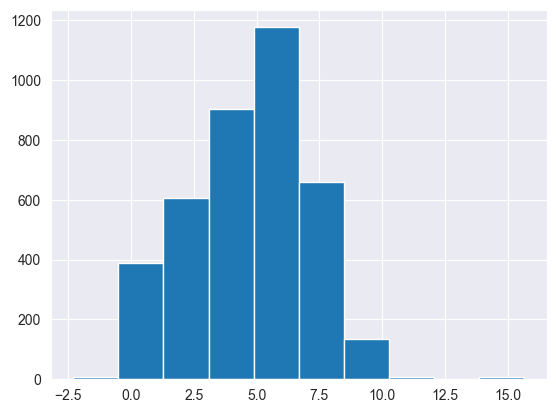

In [202]:
df_new['seconds'] = np.log(df_new['seconds'])
df_new.replace(-np.inf,0,inplace=True)
plt.hist(df_new['seconds'])
plt.show()

In [203]:
df_new.head(100)

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,long
0,2011-11-03 19:21:00,woodville,wi,us,unknown,14.005800,2 weeks,Red blinking objects similar to airplanes or s...,2011-12-12,44.953056,-92.291111
1,2004-10-03 19:05:00,cleveland,oh,us,circle,3.401197,30sec.,Many fighter jets flying towards UFO,2004-10-27,41.499444,-81.695556
3,2002-11-21 05:45:00,clemmons,nc,us,triangle,5.703782,about 5 minutes,It was a large&#44 triangular shaped flying ob...,2002-12-23,36.021389,-80.382222
4,2010-08-19 12:55:00,calgary (canada),ab,ca,oval,0.000000,2,A white spinning disc in the shape of an oval.,2010-08-24,51.083333,-114.083333
5,2012-06-16 23:00:00,san diego,ca,us,light,6.396930,10 minutes,Dancing lights that would fly around and then ...,2012-07-04,32.715278,-117.156389
...,...,...,...,...,...,...,...,...,...,...,...
118,1997-12-15 03:30:00,naperville,il,us,disk,6.396930,5-10 minutes,I was retiring for the night and got into bed....,2004-04-27,41.785833,-88.147222
119,2008-09-26 13:52:00,martinez,ca,us,oval,6.040255,7 mins.,Bubble Shaped Object Spotted in Martinez&#44CA,2008-10-31,38.019444,-122.133056
120,2003-08-03 22:30:00,pollock,la,us,light,5.192957,3 min.,Three orange lights traveling high altitude&#4...,2003-08-04,31.525556,-92.406944
121,2012-10-20 21:15:00,gilbert,az,us,light,5.480639,2-4 minutes,12 red lights over gateway airport. 1 light m...,2012-10-30,33.352778,-111.788333


## 6. Encoding categorical variables (20 points)
There are couple of columns in the UFO dataset that need to be encoded before they can be 
modeled through scikit-learn. 
You'll do that transformation here, <b>using both binary and one-hot encoding methods
This link can help; https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/ </b>.

In [204]:
from category_encoders import BinaryEncoder, OneHotEncoder

be = BinaryEncoder()
binary_encode_state = be.fit_transform(df_new['state'])
binary_encode_country = be.fit_transform(df_new['country'])
binary_encode_type = be.fit_transform(df_new['type'])
binary_encode_cities = be.fit_transform(df_new['city'])
print(binary_encode_cities)

      city_0  city_1  city_2  city_3  city_4  city_5  city_6  city_7  city_8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
4930       1       0       0       0       1       0       1       0       0   
4931       1       0       0       0       1       0       1       0       0   
4932       0       0       0       1       0       1       0       0       0   
4933       0       1       1       0       1       0       1       1       1   
4934       0       0       0       0       0       1       0       1       1   

      city_9  city_10  city_11  
0     

In [205]:
ON = OneHotEncoder()
one_hot_encode_state = ON.fit_transform(df_new['state'])
one_hot_encode_country = ON.fit_transform(df_new['country'])
one_hot_encode_type = ON.fit_transform(df_new['type'])
one_hot_encode_cities = ON.fit_transform(df_new['city'])

## 7. Text vectorization (10 points)
Let's transform the <b>desc</b> column in the UFO dataset into tf/idf vectors, 
since there's likely something we can learn from this field.

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(df_new['desc'])
print(X_vect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 8. Selecting the ideal dataset (10 points)
Let's get rid of some of the unnecessary features. 

In [207]:
ufo = df_new.drop(columns=['date','city','state','country','length_of_time','desc','recorded'])

## 9. Split the X and y using train_test_split, setting stratify = y (5 points)

In [208]:
from sklearn.model_selection import train_test_split
X = ufo.drop(["type"],axis = 1)
y = ufo["type"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


## 10. Train (fit) ML model KNeighborsClassifier (knn with n_neighbors=5) using Scikit Learn to the training sets, and print the score of knn on the test sets (5 points)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit knn to the training sets
knn.fit(X_train, y_train)
# Print the score of knn on the test sets
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.11810012836970475

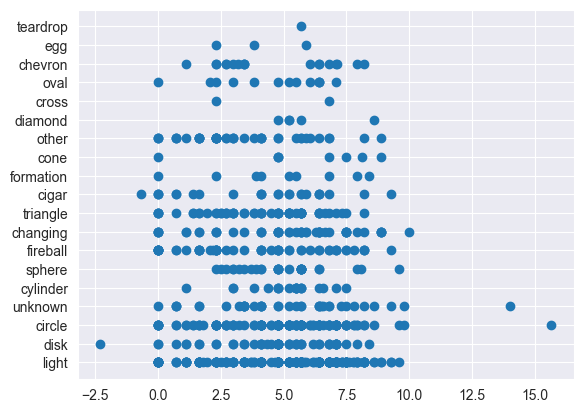

In [210]:
plt.scatter(X_test['seconds'],y_pred)
plt.show()